## Setup the Circuit

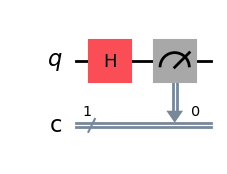

In [39]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

## Run and measure using simulator

In [41]:
from qiskit_aer import AerSimulator

bits = 8
simulator = AerSimulator()

binary = []
for _ in range(bits):
    job = simulator.run(qc, shots=1)
    counts = job.result().get_counts()
    binary.append([x for x in counts][0])

binary_str = "".join(binary)
val = int(binary_str, 2)
print(val)

189


## Prepare circuit for backend

In [55]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import dotenv

api_key = dotenv.get_key(".env", 'API_KEY')

backend_name = "ibm_sherbrooke"
backend = QiskitRuntimeService(channel="ibm_quantum", token=api_key).get_backend("ibm_sherbrooke")
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)


## Run on backend

In [62]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator, EstimatorOptions
from qiskit.quantum_info import SparsePauliOp

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0

estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, [SparsePauliOp('Z')])])
print(job.job_id())

cs60denyhpyg008avtpg
